### Import Libraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load in Dataframes

In [23]:
documents_table= pd.read_csv('documents_table.csv')
documents_table.head()
documents_table.dtypes

doc_id                              int64
doc_type                           object
year                                int64
drug                               object
drug administration error           int64
                                    ...  
eosinophil percentage decreased     int64
supraventricular tachycardia        int64
radiation skin injury               int64
hypokalaemia                        int64
all_reactions                      object
Length: 929, dtype: object

### Investigate most common drugs, referenced in historical documents

#### insights
* need to remove some values like air, body, oxygen

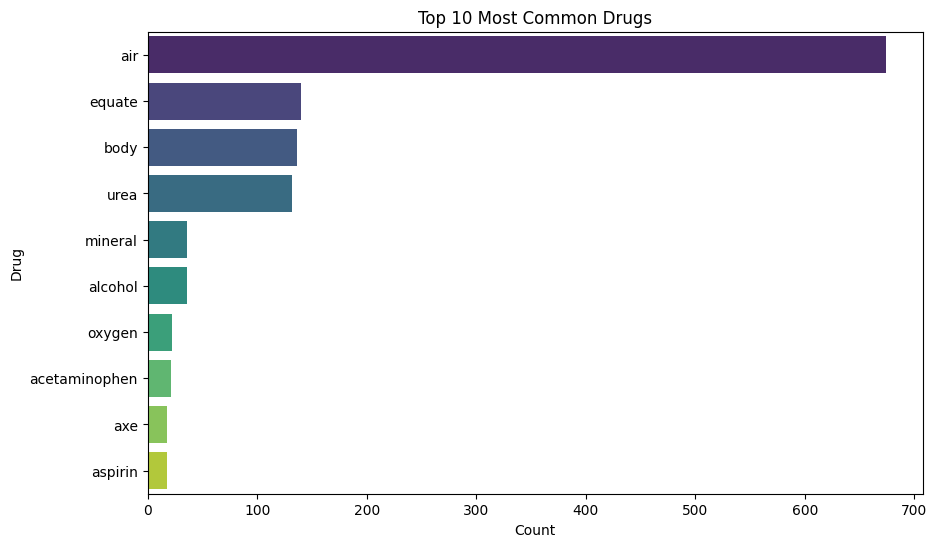

In [19]:
top_drugs = documents_table['drug'].value_counts().head(10)
top_drugs = top_drugs.reset_index().rename(columns={'index': 'drug', 'drug': 'count'})

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='drug', data=top_drugs, palette='viridis')
plt.title('Top 10 Most Common Drugs')
plt.xlabel('Count')
plt.ylabel('Drug')
plt.show()

### Investigate most common reactions, referenced in historical documents

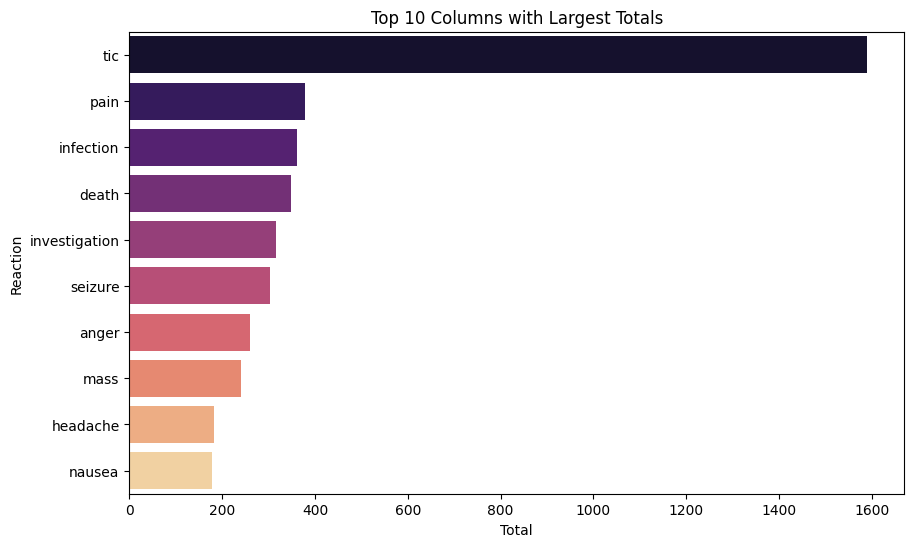

In [26]:
reaction_cols = documents_table.drop(columns=['doc_id','doc_type', 'year', 'drug', 'all_reactions']).sum()
top_reactions = reaction_cols.nlargest(10)


# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_reactions.values, y=top_reactions.index, palette='magma')
plt.title('Top 10 Columns with Largest Totals')
plt.xlabel('Total')
plt.ylabel('Reaction')
plt.show()

In [ ]:
documents_table.head()

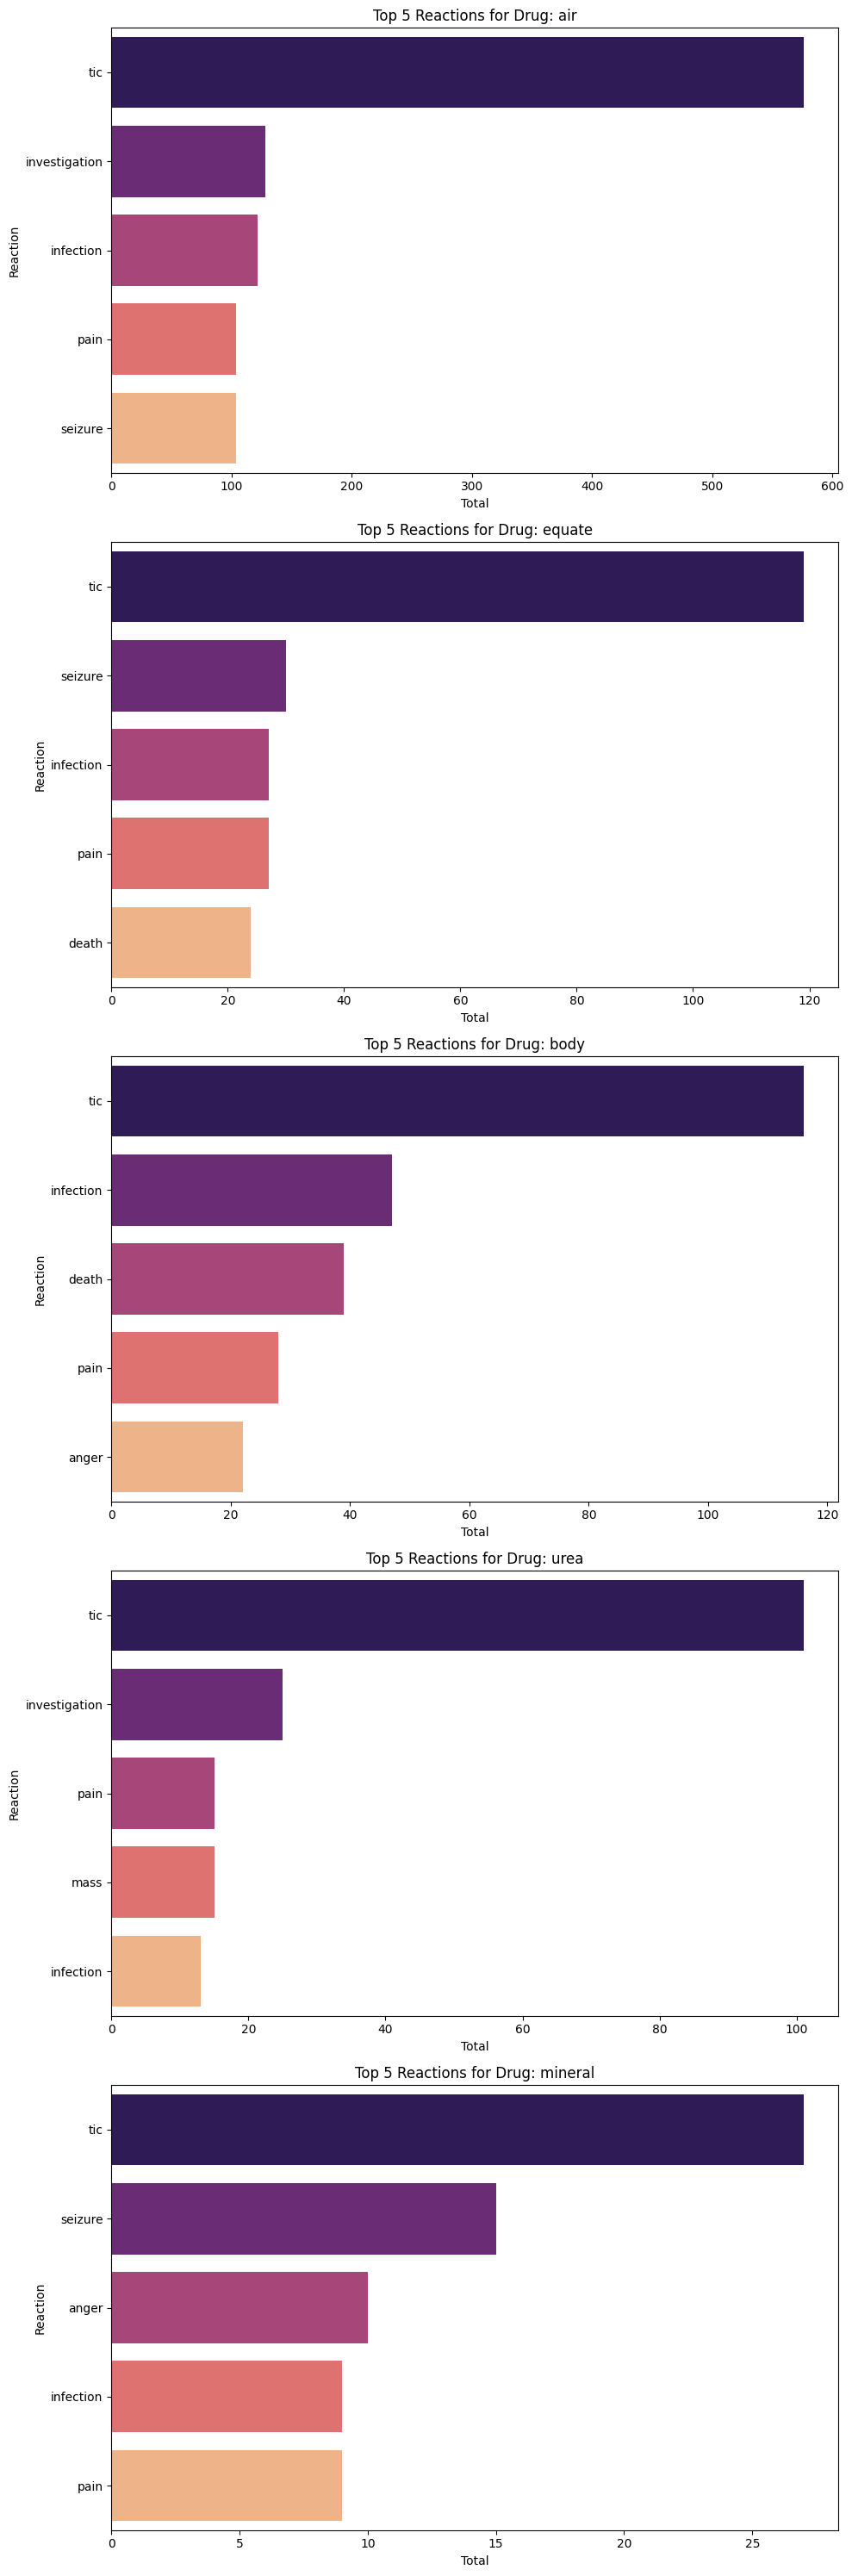

In [31]:

# Step 2: Filter documents_table to include only top 5 drugs
filtered_table = documents_table[documents_table['drug'].isin(top_drugs)]

# Step 3: Calculate top 5 reactions for each top drug
top_reactions_per_drug = {}
for drug in top_drugs:
    drug_data = filtered_table[filtered_table['drug'] == drug]
    reaction_counts = documents_table.drop(columns=['doc_id', 'doc_type', 'year', 'drug', 'all_reactions']).sum()
    top_reactions = reaction_counts.nlargest(5).index.tolist()
    top_reactions_per_drug[drug] = top_reactions

# Step 4: Create subplots for each drug
num_drugs = len(top_drugs)
fig, axes = plt.subplots(num_drugs, 1, figsize=(10, 6*num_drugs))

for i, drug in enumerate(top_drugs):
    ax = axes[i]
    drug_data = filtered_table[filtered_table['drug'] == drug]
    reaction_counts = drug_data.drop(columns=['doc_id', 'doc_type', 'year', 'drug','all_reactions']).sum()
    top_reactions = reaction_counts.nlargest(5)
    
    # Plotting
    sns.barplot(x=top_reactions.values, y=top_reactions.index, ax=ax, palette='magma')
    ax.set_title(f'Top 5 Reactions for Drug: {drug}')
    ax.set_xlabel('Total')
    ax.set_ylabel('Reaction')

plt.tight_layout()
plt.show()

# Combining Patient Reactions (outcome) with Drugs and Events based on Event_ID

## Numerical Variables

### Correlation Matrix Between All Numerical Variables

### Age by Outcome

### Number of Manufacturers by Outcome

### Drug Prices by Outcome